In [1]:
from sklearn import datasets
boston = datasets.load_boston()

In [2]:
X = boston.data
y = boston.target

In [3]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", train_index[:10])
    print("TEST - ", test_index[:10])    

TRAIN -  [ 0  1  2  4  5  6  8  9 10 11]
TEST -  [ 3  7 23 27 30 40 58 75 81 83]
TRAIN -  [ 0  1  3  4  5  6  7  8  9 10]
TEST -  [ 2 16 25 32 41 54 65 70 72 80]
TRAIN -  [0 1 2 3 4 5 6 7 8 9]
TEST -  [14 19 21 29 31 47 49 55 71 76]
TRAIN -  [ 0  1  2  3  4  5  6  7  9 10]
TEST -  [ 8 13 17 38 61 63 73 78 79 96]
TRAIN -  [ 0  2  3  4  5  6  7  8 10 11]
TEST -  [ 1  9 24 26 39 45 59 62 64 91]
TRAIN -  [0 1 2 3 4 5 6 7 8 9]
TEST -  [10 12 20 22 28 36 43 51 74 84]
TRAIN -  [0 1 2 3 4 5 6 7 8 9]
TEST -  [ 18  52  56  57  60  87 120 142 143 148]
TRAIN -  [ 0  1  2  3  4  6  7  8  9 10]
TEST -  [ 5 11 34 37 42 50 53 66 68 82]
TRAIN -  [ 0  1  2  3  4  5  7  8  9 10]
TEST -  [  6  33  44  46  77  97 111 112 132 135]
TRAIN -  [ 1  2  3  5  6  7  8  9 10 11]
TEST -  [  0   4  15  35  48  67  69  85 125 133]


In [4]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.468098837801108, 34.135235282917201)

In [5]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.468098837801108, -34.135235282917201)

In [6]:
from sklearn.model_selection import cross_validate
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores["test_score"].mean()

-34.135235282917201

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

kf = KFold(n_splits=10, shuffle=True)

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.215318673033387, -23.68035699305732)

In [8]:
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [9]:
loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.411385916387573, -23.867078861847261)

In [10]:
lasso_scores = cross_val_score(
    lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(
    ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

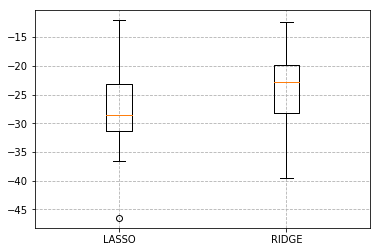

In [11]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

In [12]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.00000001 
max_iter = 10000

In [14]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)    
    
    model_list.append(sgd_regressor)


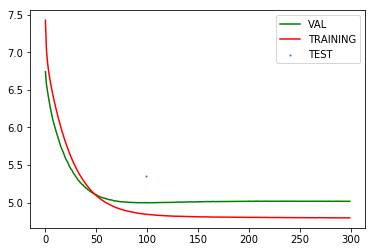

In [15]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="G", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [16]:
np.argsort(rmse_val_score)

array([ 96, 101,  99, 105, 103,  94, 104,  90,  93, 106,  97, 102, 100,
       108, 110, 107,  89,  95, 111,  87,  92,  91, 112,  98, 109, 114,
        86, 115, 116, 113,  88, 118,  84, 120, 119, 121,  85, 122,  82,
       124, 125, 123, 117, 126, 127,  83, 128, 129,  80, 132,  79, 133,
       130, 134,  81, 137, 136, 138, 135, 140, 139, 141, 142, 131, 144,
       145,  77,  76, 146, 147, 148, 143,  75, 149, 151,  78, 152, 150,
       154,  74, 156, 157, 155, 158, 161, 162, 163, 153, 159,  73, 166,
       168, 167, 169, 164, 170, 160, 172, 171, 173, 176, 179, 174, 175,
       177, 182, 165, 178, 184, 185, 188,  72, 186, 189, 180, 191, 190,
       192, 196, 195, 197,  71, 297, 199, 181, 198, 291, 299, 293, 187,
       296, 288, 282, 201, 289, 292, 276, 205, 284, 283, 204, 183, 287,
       193, 202, 281, 210, 194, 203, 267, 278, 280, 298, 213, 214, 266,
       294, 265, 219, 295, 274, 263, 273, 212, 221, 270, 220, 262, 256,
       272, 258, 254, 248, 233, 251, 206, 252, 246, 268, 257, 21

In [17]:
model_list[0].coef_

array([-0.1213174 ,  0.1051198 , -0.09570144,  0.0125437 ,  0.00636552,
        0.22116047,  0.11737461,  0.02334419,  0.00345525,  0.00567983,
        0.11639211,  0.04282219, -0.53672142])

In [18]:
model_list[98].coef_

array([-0.10222001,  0.05765709,  0.00986797,  0.36905269,  0.15870519,
        4.18562655,  0.04077333, -0.63274051,  0.13294694, -0.00675843,
       -0.16813466,  0.0205144 , -0.62476914])